# Data Challenge

## Course: Kernel Methods for Machine Learning
### M2-MVA (ENS-Paris Saclay)

Authors: Carlos Cuevas Villarmin and Javier Alejandro Lopetegui Gonzalez

**0. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Load training data.** Data is divided into three files. On the one hand the training data is provided in *Xtr.csv* and its corresponding labels in *Ytr.csv*. On the other hand, test data is in *Xte.csv* but it will be loaded once the model is trained.

The information about the structure of the data provided by the authors of the challenge is the following:

- Xtr.csv contains a matrix of size 5000 x 3072. One row represents a color image of size 32 x 32 pixels. The first 1024 values represent pixel intensities on the red channel, then the next 1024 represent the green channel, and the last 1024 entries, the blue channel. To make sure that you are reading the data correctly, you need to find a way to visualize images. Note that images have been pre-processed, and do not appear as a natural image.

- Ytr.csv contains a vector of labels corresponding to the training data, in the same format as a submission file. 

- Xte.csv contains 2000 test images. These are the ones you need to classify. The first row corresponds to image Id=1, then the last row corresponds to image Id=2000.

Taking it into account the first step is to load the data.

In [2]:
#Read training data
data_path = 'data/'
X_train = pd.read_csv(data_path+'Xtr.csv', sep=',', header=None)
Y_train = pd.read_csv(data_path+'Ytr.csv', sep=',')

In [3]:
#Transform into pandas dataframe
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)

#Visualize the data
display(X_train.head())
display(Y_train.head())

print(X_train.shape, Y_train.shape)


,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,0.007018,0.000323,0.002215,0.000781,-0.005636,-0.001525,-0.001090,-0.001907,0.004179,-0.004225,...,-0.002166,-0.005094,0.001906,-0.006143,-0.013265,-0.013873,0.005223,-0.000860,-0.012881,NaN
1,0.000819,0.001688,0.002698,0.004685,0.011166,0.017482,0.045989,0.031377,0.032150,0.062066,...,0.007203,0.008634,0.006800,0.014114,0.000243,-0.019384,-0.046763,-0.048919,-0.057449,NaN
2,-0.016779,0.006662,-0.007226,-0.003798,-0.004273,-0.009955,-0.030925,-0.007064,0.008136,0.000618,...,-0.023748,0.047707,0.072310,0.056837,0.045410,0.015561,0.003272,-0.013745,0.000968,NaN
3,0.014936,0.004218,0.009732,0.007309,0.004914,0.008172,0.014205,-0.023263,-0.023014,0.011482,...,-0.029634,-0.024069,-0.000788,-0.005010,-0.004260,0.014308,-0.010997,-0.025966,-0.025786,NaN
4,-0.073091,-0.046800,-0.056235,-0.063619,-0.088387,-0.044682,-0.014172,-0.077535,-0.100056,-0.066161,...,-0.018166,0.012983,0.022676,0.014233,0.047403,0.052239,-0.029272,0.001368,-0.001475,NaN


,Id,Prediction
0,1,8
1,2,9
2,3,3
3,4,1
4,5,4


(5000, 3073) (5000, 2)


Drop the last column of X_train because it is generated by the format of the data but it is unnecessary.

In [4]:
#Drop the last column of X_train
X_train = X_train.drop(columns=[3072])

In [5]:
display(X_train.head())

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.007018,0.000323,0.002215,0.000781,-0.005636,-0.001525,-0.001090,-0.001907,0.004179,-0.004225,...,0.004146,-0.002166,-0.005094,0.001906,-0.006143,-0.013265,-0.013873,0.005223,-0.000860,-0.012881
1,0.000819,0.001688,0.002698,0.004685,0.011166,0.017482,0.045989,0.031377,0.032150,0.062066,...,-0.000530,0.007203,0.008634,0.006800,0.014114,0.000243,-0.019384,-0.046763,-0.048919,-0.057449
2,-0.016779,0.006662,-0.007226,-0.003798,-0.004273,-0.009955,-0.030925,-0.007064,0.008136,0.000618,...,-0.029953,-0.023748,0.047707,0.072310,0.056837,0.045410,0.015561,0.003272,-0.013745,0.000968
3,0.014936,0.004218,0.009732,0.007309,0.004914,0.008172,0.014205,-0.023263,-0.023014,0.011482,...,-0.004505,-0.029634,-0.024069,-0.000788,-0.005010,-0.004260,0.014308,-0.010997,-0.025966,-0.025786
4,-0.073091,-0.046800,-0.056235,-0.063619,-0.088387,-0.044682,-0.014172,-0.077535,-0.100056,-0.066161,...,0.011063,-0.018166,0.012983,0.022676,0.014233,0.047403,0.052239,-0.029272,0.001368,-0.001475


In [6]:
#Change the index from 0 to 4999 to 1 to 5000
X_train.index = X_train.index+1 #To have the same index as Y_train
display(X_train.head())

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
1,0.007018,0.000323,0.002215,0.000781,-0.005636,-0.001525,-0.001090,-0.001907,0.004179,-0.004225,...,0.004146,-0.002166,-0.005094,0.001906,-0.006143,-0.013265,-0.013873,0.005223,-0.000860,-0.012881
2,0.000819,0.001688,0.002698,0.004685,0.011166,0.017482,0.045989,0.031377,0.032150,0.062066,...,-0.000530,0.007203,0.008634,0.006800,0.014114,0.000243,-0.019384,-0.046763,-0.048919,-0.057449
3,-0.016779,0.006662,-0.007226,-0.003798,-0.004273,-0.009955,-0.030925,-0.007064,0.008136,0.000618,...,-0.029953,-0.023748,0.047707,0.072310,0.056837,0.045410,0.015561,0.003272,-0.013745,0.000968
4,0.014936,0.004218,0.009732,0.007309,0.004914,0.008172,0.014205,-0.023263,-0.023014,0.011482,...,-0.004505,-0.029634,-0.024069,-0.000788,-0.005010,-0.004260,0.014308,-0.010997,-0.025966,-0.025786
5,-0.073091,-0.046800,-0.056235,-0.063619,-0.088387,-0.044682,-0.014172,-0.077535,-0.100056,-0.066161,...,0.011063,-0.018166,0.012983,0.022676,0.014233,0.047403,0.052239,-0.029272,0.001368,-0.001475


In [7]:
#Set the index of Y_train by the column Id
Y_train = Y_train.set_index('Id')
display(Y_train.head())

,Prediction
Id,
1,8
2,9
3,3
4,1
5,4


**2. Data visualization.** In order to have deeper knowledge of the data we are working with let visualize the images of the set.

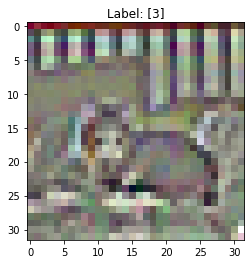

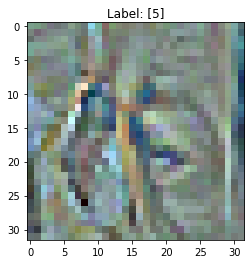

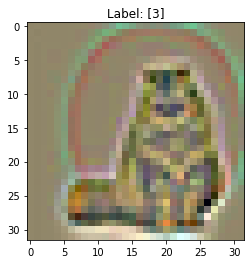

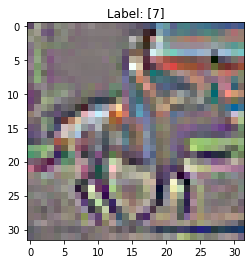

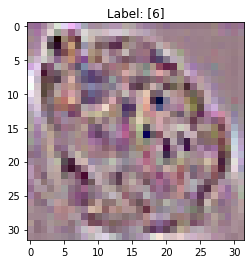

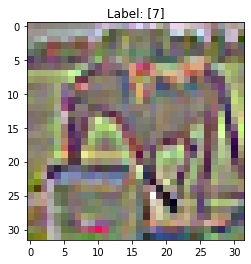

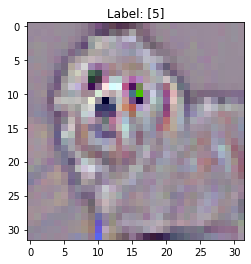

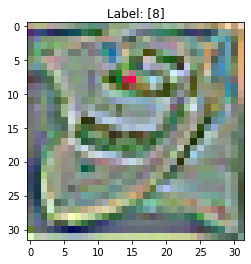

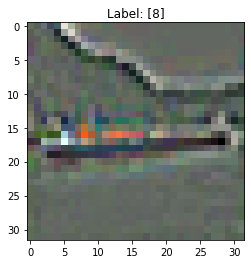

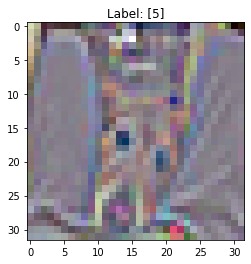

In [61]:
#Visualize the images of the first 5 samples
for i in range(10,20):
    image = np.reshape(np.array(X_train.loc[i]), (3,32,32)).astype(float)

    #image = image / 2 + 0.5
    # Separate color channels
    red_channel = image[0]
    green_channel = image[1]
    blue_channel = image[2]

    
    # Normalize each channel 
    red_channel = (red_channel- red_channel.min()) / (red_channel.max()-red_channel.min())
    green_channel = (green_channel - green_channel.min()) / (green_channel.max()-green_channel.min())
    blue_channel = (blue_channel - blue_channel.min()) / (blue_channel.max() - blue_channel.min())

    # Combine channels to form the original image
    original_image = np.stack((red_channel, green_channel, blue_channel), axis=-1)

    plt.imshow(original_image,cmap='viridis', vmin=0, vmax=1)
    plt.title('Label: '+str(Y_train.loc[i].values))
    plt.show()